In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [141]:
train = pd.read_csv(r'D:\data\competition\titanic\train.csv')
test = pd.read_csv(r'D:\data\competition\titanic\test.csv')

In [142]:
# 显示头5条数据，了解数据
# PassengerId指的是游客编号，次列对于预测生还没有意义，应删除
# Survived是标签列（0 or 1）
# Pclass指的是舱位等级，1表示高等舱，2表示中等舱，3表示低等舱
# Name指的是乘客的姓名，次列无法直接使用
# Age表示乘客的年龄，可通过统计数据进行进一步了解
# SibSp表示的是在船上的兄弟姐妹的数量
# Parch表示的是在船上的家长儿童的数量
# Ticket表示票号
# Fare表示船票价格
# Cabin表示船舱号
# Embarked表示的是登录的港口
print('训练集前五行为：')
train.head(5)

训练集前五行为：


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
print('测试集前五行为：')
test.head(5)

测试集前五行为：


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [144]:
#删除无关列
if 'PassengerId' in train.columns:
    train.drop(['PassengerId'], axis=1, inplace = True)
    
if 'PassengerId' in test.columns:
    test.drop(['PassengerId'], axis=1, inplace = True)

In [145]:
print('训练集的类型和数目为：')
train.info()
print('测试集的类型和数目为：')
test.info()

训练集的类型和数目为：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
测试集的类型和数目为：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), objec

In [146]:
print('训练集的统计信息为：')
train.describe()

训练集的统计信息为：


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [147]:
print('测试集的统计信息为：')
test.describe()

测试集的统计信息为：


,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


# 对比训练集和测试集中各个特征的分布情况

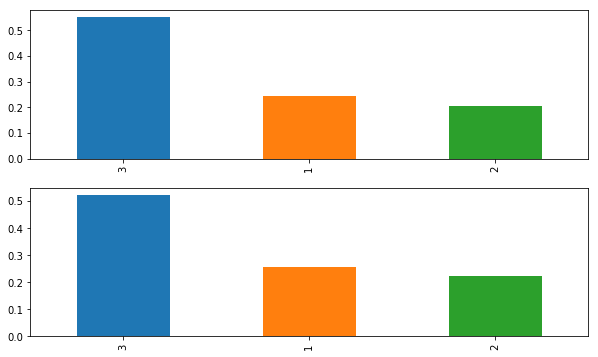

In [148]:
#对舱位等级的分布进行可视化
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['Pclass'].value_counts(normalize = True).plot(kind = 'bar', ax = ax1)
ax2 = fig.add_subplot(212)
test['Pclass'].value_counts(normalize = True).plot(kind = 'bar', ax = ax2)

#可见舱位等级分布几乎相同，低等舱位的人最多，其次为高等舱，最终为低等舱

In [149]:
print('训练集样本中的名字次数统计为：')
print(train['Name'].value_counts())
print('测试集样本中的名字次数统计为：')
print(test['Name'].value_counts())

#由于没有重复的名字，所以需要对名字进行处理

训练集样本中的名字次数统计为：
Harknett, Miss. Alice Phoebe                       1
Turkula, Mrs. (Hedwig)                             1
Ford, Miss. Doolina Margaret "Daisy"               1
McEvoy, Mr. Michael                                1
Ball, Mrs. (Ada E Hall)                            1
Johnson, Mr. Alfred                                1
Radeff, Mr. Alexander                              1
Novel, Mr. Mansouer                                1
Jardin, Mr. Jose Neto                              1
Montvila, Rev. Juozas                              1
Coutts, Master. William Loch "William"             1
Lam, Mr. Ali                                       1
Skoog, Miss. Margit Elizabeth                      1
Goodwin, Master. Sidney Leonard                    1
Thorne, Mrs. Gertrude Maybelle                     1
Reuchlin, Jonkheer. John George                    1
Theobald, Mr. Thomas Leonard                       1
Ross, Mr. John Hugo                                1
Johnson, Master. Harold Theodo

In [150]:
def process_name(name):
    prior_name = name
    
    bracket_pos = name.find(r'(')
    if  bracket_pos != -1:
        name = name[: bracket_pos]
        
    dot_pos = name.find(r'.')
    if dot_pos != -1:
        name = name[dot_pos+1: ]
        
    if len(name.strip()) == 0:
        prior_name = prior_name.strip()
        return prior_name.split(' ')[-1].strip(r'()').replace('"', '')
        
    return name.replace('"', '').strip()
    

In [151]:
train['Name'] = train['Name'].apply(process_name)
test['Name'] = test['Name'].apply(process_name)

In [152]:
print('修改后训练集样本中的名字次数统计为：')
print(train['Name'].value_counts())
print('修改后测试集样本中的名字次数统计为：')
print(test['Name'].value_counts())

#此处理不一定有效，还需要名字和survived进行关联查看

修改后训练集样本中的名字次数统计为：
William               11
John                  10
James                  9
Mary                   7
Joseph                 5
Samuel                 5
Thomas                 5
Ivan                   4
Bertha                 4
William John           4
Martin                 4
George                 4
Edward                 4
William Henry          4
Frederick              3
Anna Sofia             3
Victor                 3
David                  3
Alfred                 3
Alice                  3
Harry                  3
Emil                   3
Tannous                3
Benjamin               3
Elizabeth              3
Johan                  3
Patrick                3
Anna                   3
Hanora Nora            2
Kate                   2
                      ..
Edvard                 1
Aloisia                1
Simon                  1
August Sigfrid         1
Wendla Maria           1
Albert A               1
Constance Gladys       1
Mara                   1
Sante 

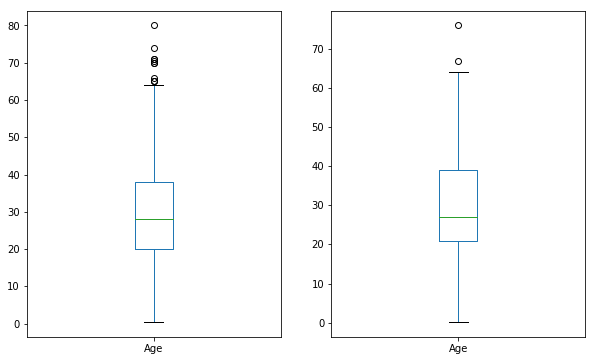

In [122]:
#对年龄的分布进行可视化
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(121)
train['Age'].plot(kind = 'box', ax = ax1)
ax2 = fig.add_subplot(122)
test['Age'].plot(kind = 'box', ax = ax2)

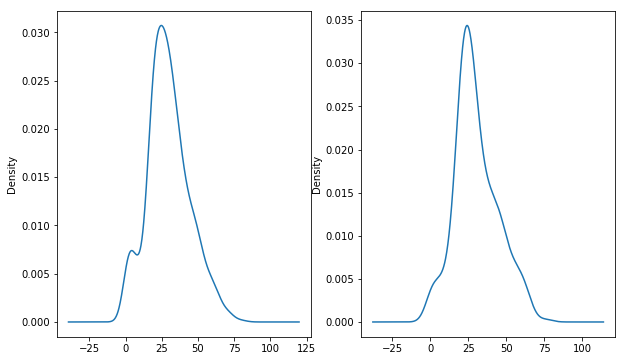

In [123]:
#对年龄的分布进行可视化
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(121)
train['Age'].plot(kind = 'kde', ax = ax1)
ax2 = fig.add_subplot(122)
test['Age'].plot(kind = 'kde', ax = ax2)

#年龄的分布大体相同，但是在训练集中年龄大于65岁的人大约有10位，但在测试集中只有两位。

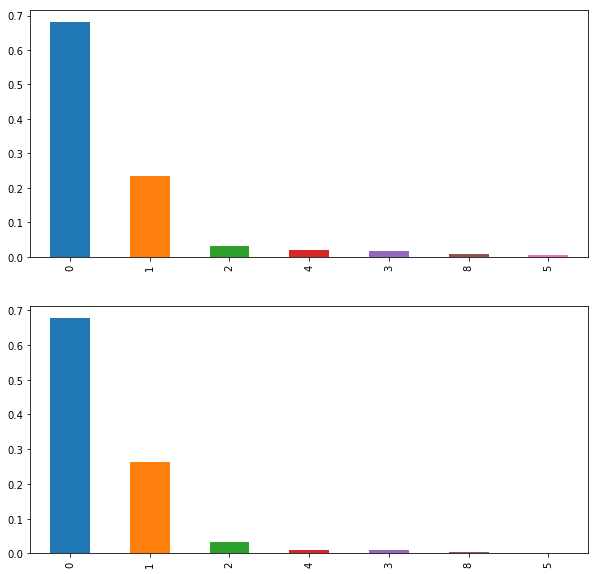

In [124]:
#对船上的兄弟姐妹个数的分布进行可视化
sns.set_context({"figure.figsize": (10, 10)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['SibSp'].value_counts(normalize = True).plot(kind = 'bar', ax = ax1)
ax2 = fig.add_subplot(212)
test['SibSp'].value_counts(normalize = True).plot(kind = 'bar', ax = ax2)

#兄弟姐妹个数分布大体相同，而且船上兄弟姐妹的个数为0的频率最高，大于4的频率非常小

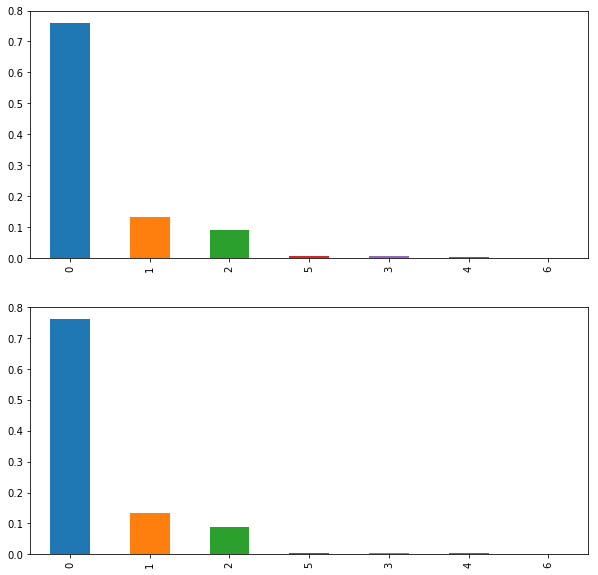

In [125]:
#对子女和父母个数的分布进行可视化
sns.set_context({"figure.figsize": (10, 10)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['Parch'].value_counts(normalize = True).plot(kind = 'bar', ax = ax1)
ax2 = fig.add_subplot(212)
train['Parch'].value_counts(normalize = True).plot(kind = 'bar', ax = ax2)

#对子女和父母个数分布大体相同，数量为0的频率最高，大于4的频率非常小

In [126]:
print('训练集样本中的票号次数统计为：')
print(train['Ticket'].value_counts())
print('测试集样本中的票号次数统计为：')
print(test['Ticket'].value_counts())

#此处理不一定有效，还需要和survived进行关联查看

训练集样本中的票号次数统计为：
1601                  7
CA. 2343              7
347082                7
CA 2144               6
347088                6
3101295               6
S.O.C. 14879          5
382652                5
19950                 4
4133                  4
113760                4
17421                 4
347077                4
W./C. 6608            4
349909                4
113781                4
PC 17757              4
2666                  4
LINE                  4
29106                 3
PC 17755              3
PC 17760              3
248727                3
347742                3
35273                 3
230080                3
F.C.C. 13529          3
363291                3
345773                3
24160                 3
                     ..
7598                  1
PC 17482              1
315082                1
364850                1
113783                1
112058                1
349228                1
113807                1
233639                1
28134                 1


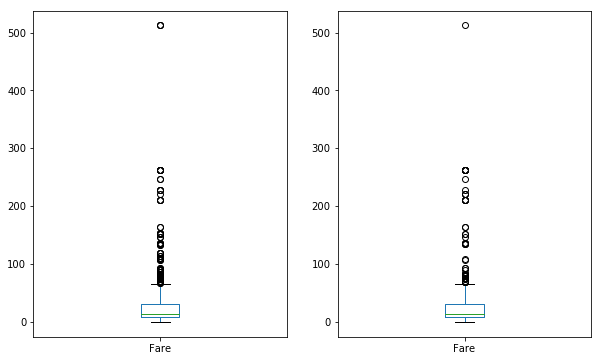

In [127]:
#对票价的分布进行可视化
sns.set_context({"figure.figsize": (10, 6)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(121)
train['Fare'].plot(kind = 'box', ax = ax1)
ax2 = fig.add_subplot(122)
test['Fare'].plot(kind = 'box', ax = ax2)

#根据boxplot可知票价分布大体相同

In [128]:
print('训练集样本中的船舱号次数统计为：')
print(train['Cabin'].value_counts())
print('测试集样本中的船舱号次数统计为：')
print(test['Cabin'].value_counts())

#此处理不一定有效，还需要和survived进行关联查看

训练集样本中的船舱号次数统计为：
C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
E101           3
F2             3
D              3
C65            2
F G73          2
E67            2
B20            2
C78            2
D20            2
D17            2
C123           2
D36            2
E33            2
B5             2
C92            2
B51 B53 B55    2
C2             2
D33            2
C125           2
E44            2
D35            2
B58 B60        2
C124           2
C93            2
B49            2
              ..
E49            1
C90            1
E50            1
D37            1
C118           1
C32            1
C46            1
D47            1
B39            1
C148           1
E31            1
C49            1
C95            1
D56            1
A26            1
E46            1
C86            1
A19            1
A24            1
B101           1
A7             1
D10 D12        1
E63            1
C30            1
C54            1
D48            1
C110          

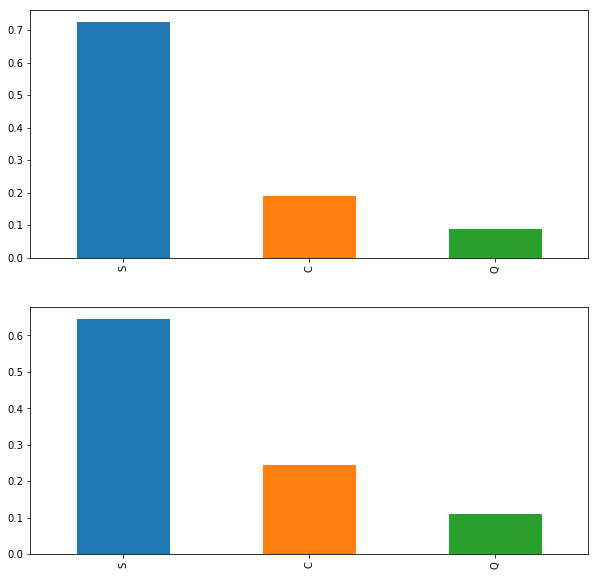

In [129]:
#对登录港口的分布进行可视化
sns.set_context({"figure.figsize": (10, 10)}) #设置画布大小
fig = plt.figure()
ax1 = fig.add_subplot(211)
train['Embarked'].value_counts(normalize = True).plot(kind = 'bar', ax = ax1)
ax2 = fig.add_subplot(212)
test['Embarked'].value_counts(normalize = True).plot(kind = 'bar', ax = ax2)

#根据barplot和boxplot可知登录港口分布大体相同

### 根据上述观察，各个特征的分布大体相同，所以使用训练集加机器学习算法来预测测试集的结果

# 单特征在不同标签下的数据分布

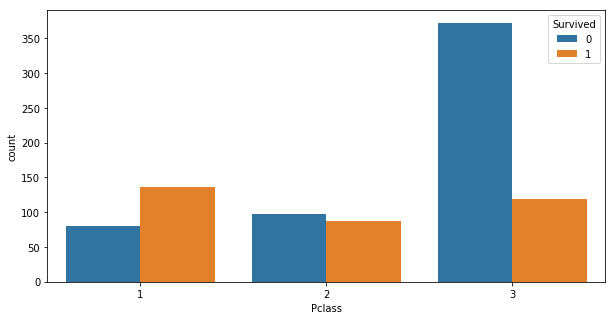

In [130]:
# 舱位等级和生还的关系
sns.set_context({"figure.figsize": (10, 5)})
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

#结论：有钱可以为所欲为

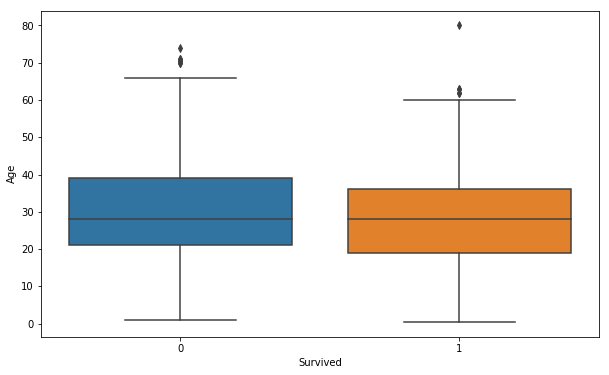

In [131]:
# 舱位等级和生还的关系
sns.set_context({"figure.figsize": (10, 6)})
sns.boxplot(data = train, x = 'Survived', y = 'Age')

#年龄特别大的生还，遇难的人中20~30的年轻人比较多（遇难者的中位数处于盒子的下方）。

In [41]:
train[['Name','Survived']].groupby('Name')['Survived'].value_counts()

Name                         Survived
Abraham                      0           1
Achille                      0           1
Adele Kiamie Jane            1           1
Adola                        0           1
Adolf Mathias Nicolai Olsen  0           1
Adolphe                      1           1
Agda Thorilda Viktoria       0           1
Agnes                        1           1
Ahmed                        0           1
Albert                       0           2
Albert A                     0           1
Albert Adrian                1           2
Albert Francis               1           1
Albert Johan                 1           1
Albina                       1           1
Alden Gates                  1           1
Alexander                    0           2
Alexander A                  0           1
Alexander Oskar              0           1
                             1           1
Alfons                       0           1
Alfonzo                      0           1
Alfred          

d:\ProgramData\Anaconda2\envs\python3.6\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


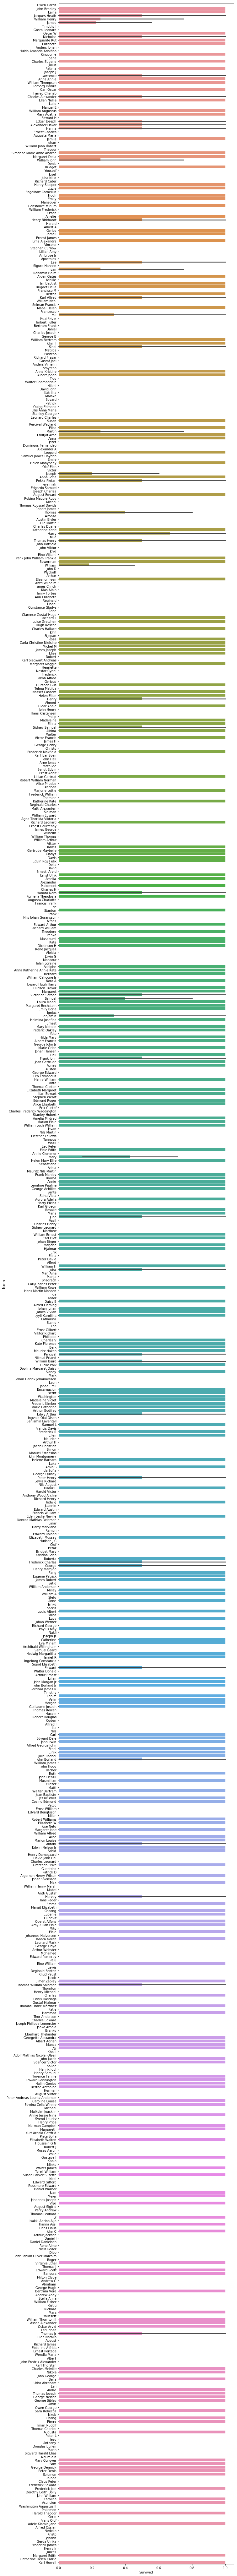

In [47]:
#  画图绘制转换后的姓名的生存和死亡的分布
sns.set_context({"figure.figsize": (10, 150)})
sns.barplot(data = train, x = 'Survived', y = 'Name', orient='h')

#下一步可以考虑把同名而且人数大于等于2的名字中都生还的转换为一个名字，都死亡的转换成一个名
# 其他的为另外一个值

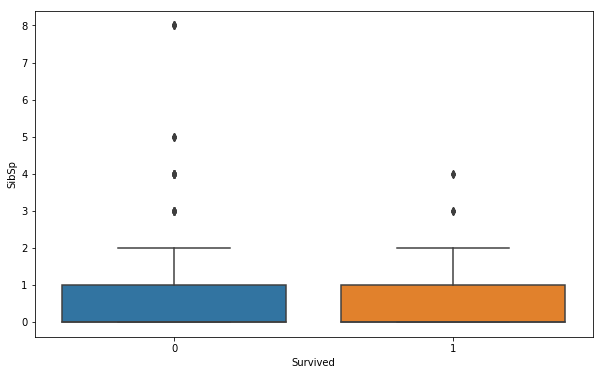

In [132]:
# 兄弟姐妹和生还的关系
sns.set_context({"figure.figsize": (10, 6)})
sns.boxplot(data = train, x = 'Survived', y = 'SibSp')

# 兄弟姐妹特别多的人都死了

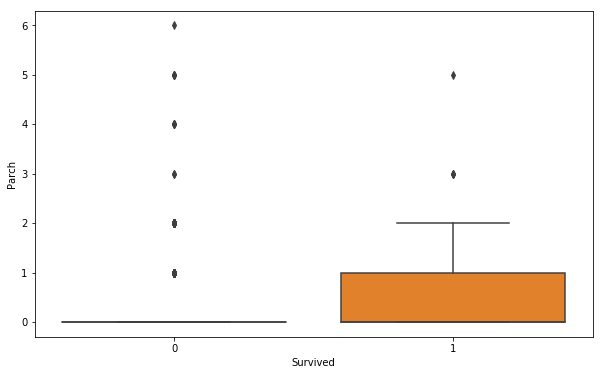

In [50]:
# 子女父母和生还的关系
sns.set_context({"figure.figsize": (10, 6)})
sns.boxplot(data = train, x = 'Survived', y = 'Parch')

# 特别多的都死了

d:\ProgramData\Anaconda2\envs\python3.6\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


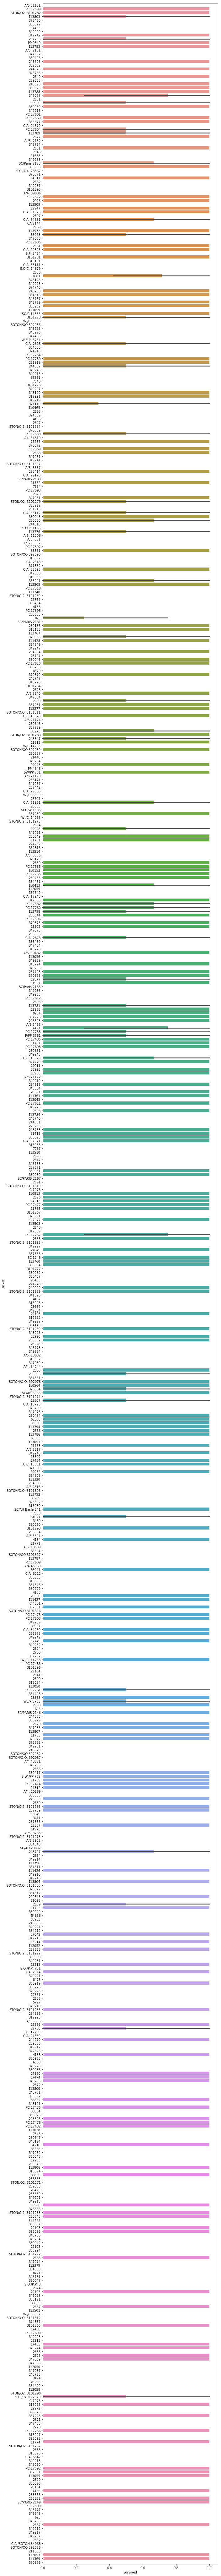

In [51]:
#  画图绘制票号的生存和死亡的分布
sns.set_context({"figure.figsize": (10, 150)})
sns.barplot(data = train, x = 'Survived', y = 'Ticket', orient='h')

# 可以考虑使用和姓名相同的处理方式

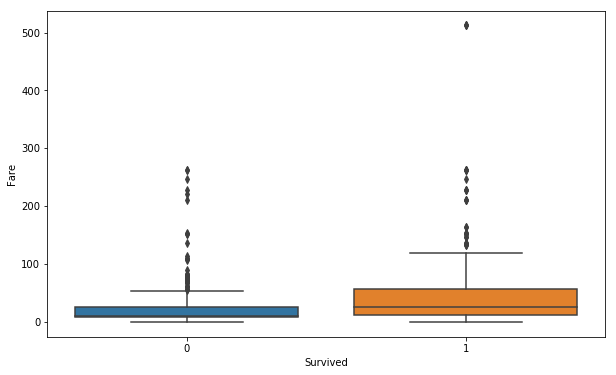

In [133]:
# 票价和生还的关系
sns.set_context({"figure.figsize": (10, 6)})
sns.boxplot(data = train, x = 'Survived', y = 'Fare')

# 特别有钱的生还了

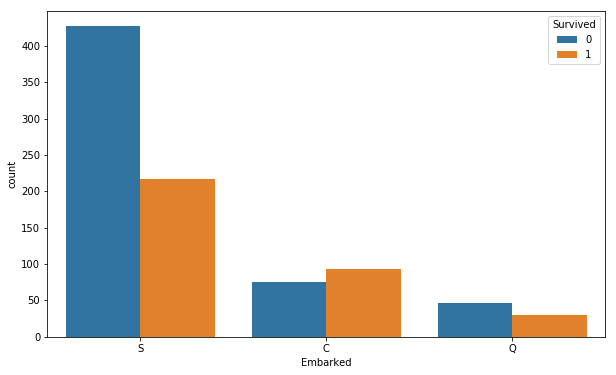

In [97]:
# 登船港口和生还的关系
sns.set_context({"figure.figsize": (10, 6)})
sns.countplot(x = 'Embarked', hue = 'Survived', data = train)

# 特别有钱的生还了

# 处理缺失值

In [134]:
print('训练集的类型和数目为：')
train.info()
print('测试集的类型和数目为：')
test.info()

训练集的类型和数目为：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
测试集的类型和数目为：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), objec

In [162]:
#Cabin的缺失比例比较大，所以直接删除
if 'PassengerId' in train.columns:
    train.drop(['Cabin'], axis=1, inplace = True)
    
if 'PassengerId' in test.columns:
    test.drop(['Cabin'], axis=1, inplace = True)

In [154]:
# 对年龄进行填充，使用age的中位数进行填充
def fill_miss_age(data):
    data['Age'].fillna(data['Age'].median(), inplace = True)
    return data

train = fill_miss_age(train)
test = fill_miss_age(test)

In [156]:
# 在测试集中有一个Fare的缺失值，所以需要填充
def fill_miss_fare(data):
    data['Fare'].fillna(data['Fare'].median(), inplace = True)
    return data

In [157]:
train = fill_miss_fare(train)
test = fill_miss_fare(test)

In [166]:
def fill_miss_embark(data):
    data['Embarked'].fillna(data['Embarked'].mode(), inplace = True)
    return data

In [167]:
train = fill_miss_embark(train)
test = fill_miss_embark(test)